In [34]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [35]:
# starting the program by loading the "loading_breast_cancer" dataset from sklearn
import finder

In [36]:
warnings.filterwarnings('ignore')

In [37]:
data = finder.data
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [38]:
print(f'Number of the outcome variable: {len(np.unique(data.target))}. Possible values: {np.unique(data.target)} Labels: {(data.target_names)}')

Number of the outcome variable: 2. Possible values: [0 1] Labels: ['malignant' 'benign']


In [39]:
print(f'Observations: {data.data.shape[0]}, features: {data.feature_names.shape}')

Observations: 569, features: (30,)


In [40]:
# importing the transformed dataframe from finder 
df = finder.dataframe
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [41]:
# making the columns as features and investigate at the same time whether they have multicollinearity or not (high correlation)
columns = df.columns.to_list()[:10]
columns

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [42]:
df[['mean area', 'mean symmetry']].corr().iloc[0,1]

0.15129307903511224

In [43]:
# plt.figure(figsize=[16, 16])
# sns.heatmap(df[columns].corr(), annot=True, cmap = 'coolwarm', linewidths=2, linecolor='white')
# plt.title('Heatmap')
# plt.savefig('big_heatmap.png')
# plt.show()
# plt.clf()

In [44]:
features = columns[:2]+columns[4:5]+columns[8:]

In [45]:
# importing the helper file
import helper

In [46]:
features = helper.corr_(df)

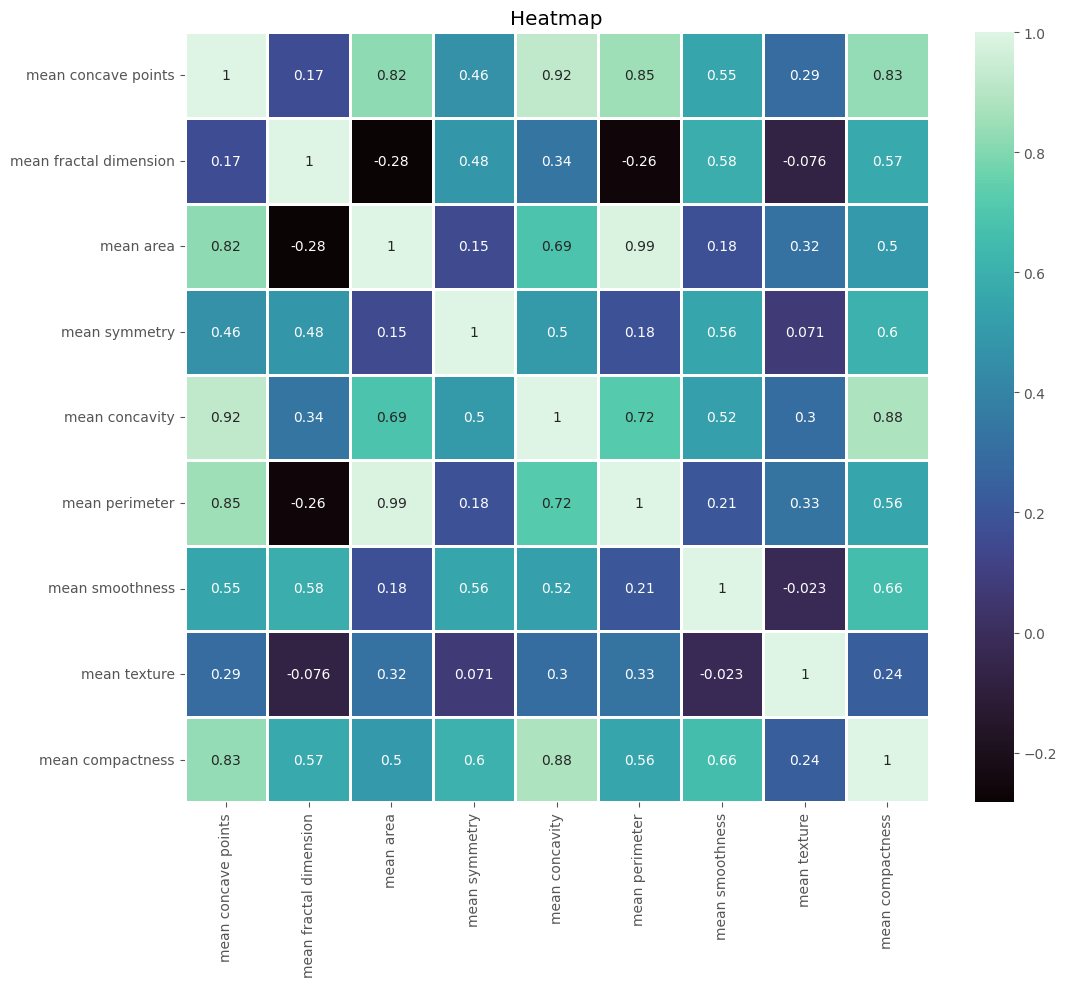

<Figure size 640x480 with 0 Axes>

In [47]:
helper.custom_heat_(df, features)

In [48]:
# make X and y as predictor(df for the first run) and outcome(one D array) variables to the model
X = df[features]
y = data.target
type(X), type(y)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [49]:
a, b = np.sum(y == 0), np.sum(y == 1)
f'Malingnant tumors number: {a}, benign tumors number: {b}'

'Malingnant tumors number: 212, benign tumors number: 357'

In [50]:
print(f'The sample is imbalanced, the benign tumors (true positivity) rate is {b/(b+a):.2}')

The sample is imbalanced, the benign tumors (true positivity) rate is 0.63


In [51]:
min_class_size = min(a, b)
# At a maximum, there should be no more than the smallest class size divided by 10 number of features.
max_features = min_class_size / 10
print(f'Maximum features could be {round(max_features)}, the current number of predictor variables is {len(X.columns)}.'
      f'he statement that the sample is big enough is {max_features > X.columns.nunique()}')

Maximum features could be 21, the current number of predictor variables is 9.he statement that the sample is big enough is True


<Figure size 1200x1000 with 0 Axes>

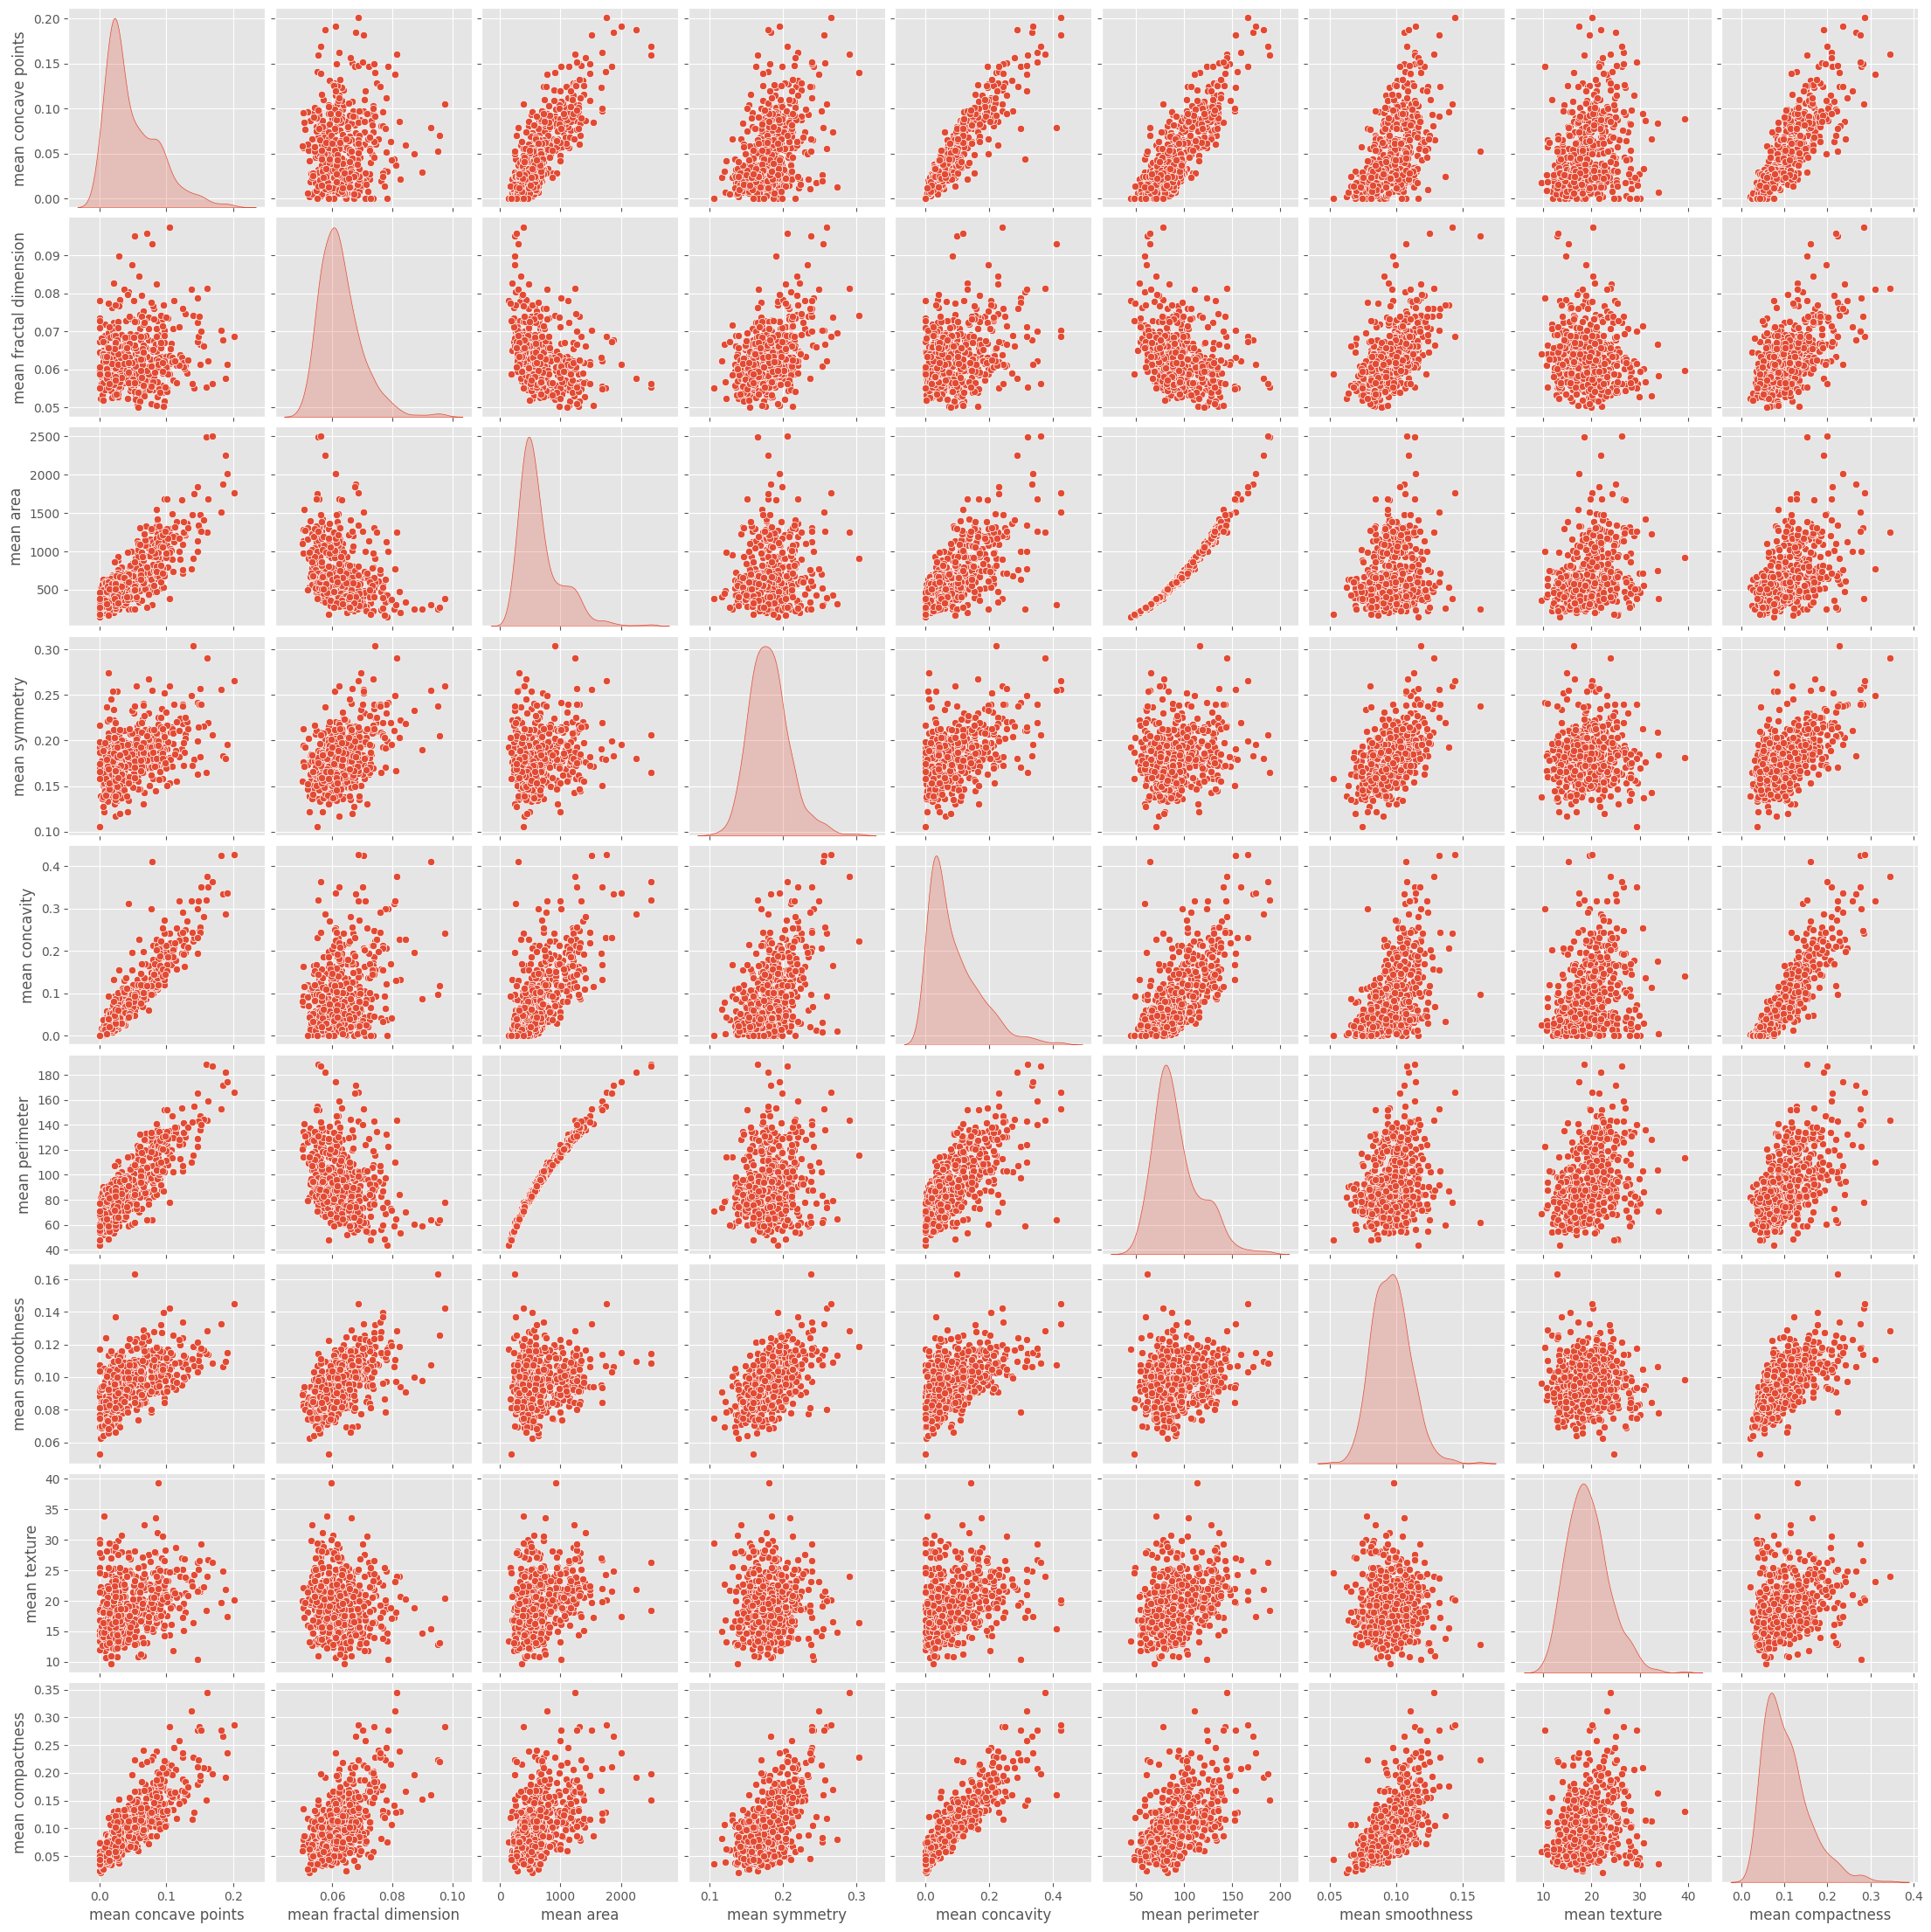

<Figure size 640x480 with 0 Axes>

In [52]:
# make a pairplot just for fun
helper.pair_(X)

In [53]:
X.head(3)

,mean concave points,mean fractal dimension,mean area,mean symmetry,mean concavity,mean perimeter,mean smoothness,mean texture,mean compactness
0,0.14710,0.07871,1001.0,0.2419,0.3001,122.8,0.11840,10.38,0.27760
1,0.07017,0.05667,1326.0,0.1812,0.0869,132.9,0.08474,17.77,0.07864
2,0.12790,0.05999,1203.0,0.2069,0.1974,130.0,0.10960,21.25,0.15990


In [54]:
#np.mean(X['mean radius'])

In [55]:
# standardize the X values by initalizing the StandardScaler then fit and transform the dataframe (X) back into a 2D array
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [56]:
X = scaler.transform(X)

In [57]:
X

array([[ 2.53247522,  2.25574689,  0.9843749 , ...,  1.56846633,
        -2.07333501,  3.28351467],
       [ 0.54814416, -0.86865246,  1.90870825, ..., -0.82696245,
        -0.35363241, -0.48707167],
       [ 2.03723076, -0.39800791,  1.55888363, ...,  0.94221044,
         0.45618695,  1.05292554],
       ...,
       [ 0.10577736, -0.89558693,  0.57795264, ..., -0.84048388,
         2.0455738 , -0.03867967],
       [ 2.65886573,  1.04369542,  1.73521799, ...,  1.52576706,
         2.33645719,  3.27214378],
       [-1.26181958, -0.56103238, -1.34778924, ..., -3.11208479,
         1.22179204, -1.15075248]])

In [58]:
np.mean(X[:,0])

1.0239807439776487e-15

In [59]:
type(X), type(y), X.shape, y.shape

(numpy.ndarray, numpy.ndarray, (569, 9), (569,))

In [60]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [61]:
c, d, e, f = np.sum(y_train == 1), np.sum(y_train == 0), np.sum(y_test == 1), np.sum(y_test == 0)
f'The train true positivity rate is {c/(c+d):.2}, the test true positivity rate is {e/(e+f):.2}'

'The train true positivity rate is 0.62, the test true positivity rate is 0.65'

In [62]:
# making a LogisticRegression model, fit the training X and y values and then predict y values with using test x values
lrm = LogisticRegression(penalty=None, fit_intercept=True, class_weight='balanced')
model = lrm.fit(X_train, y_train)

In [63]:
threshold = 0.9
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = np.where(y_pred_proba > threshold, 1, 0)
y_test, y_pred

(array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]),
 array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0

In [64]:
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

for i in range(len(y_test)):
  if y_test[i] == 1 and y_pred[i] == 1:
    true_positives += 1
  elif y_test[i] == 0 and y_pred[i] == 0:
    true_negatives += 1
  elif y_test[i] == 0 and y_pred[i] == 1:
    false_positives += 1
  else:
    false_negatives +=1
print(true_positives, true_negatives, false_positives, false_negatives)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

80 58 1 32
[[58  1]
 [32 80]]


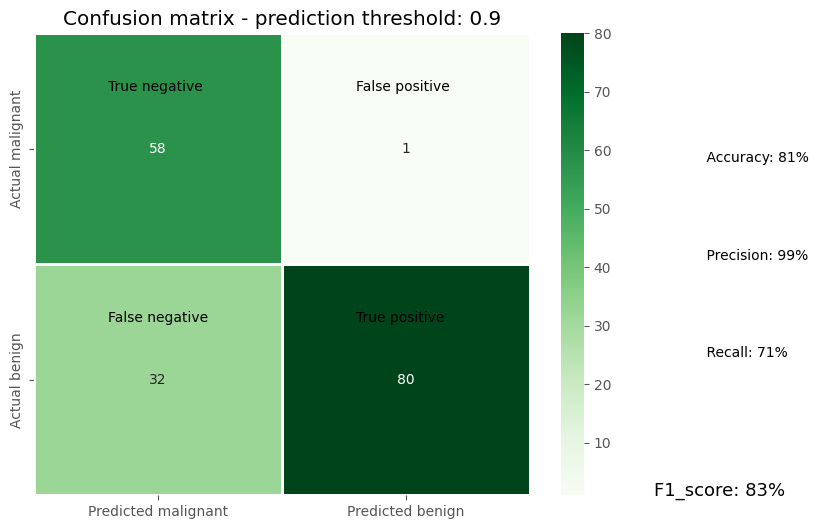

<Figure size 640x480 with 0 Axes>

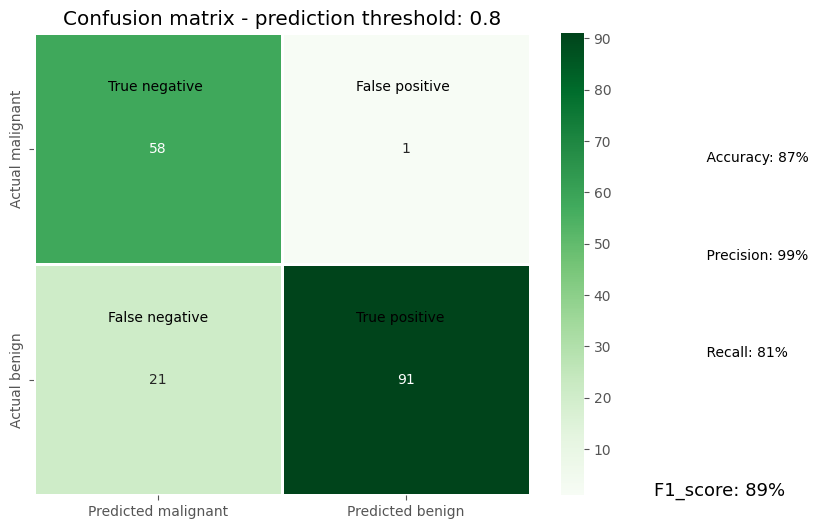

<Figure size 640x480 with 0 Axes>

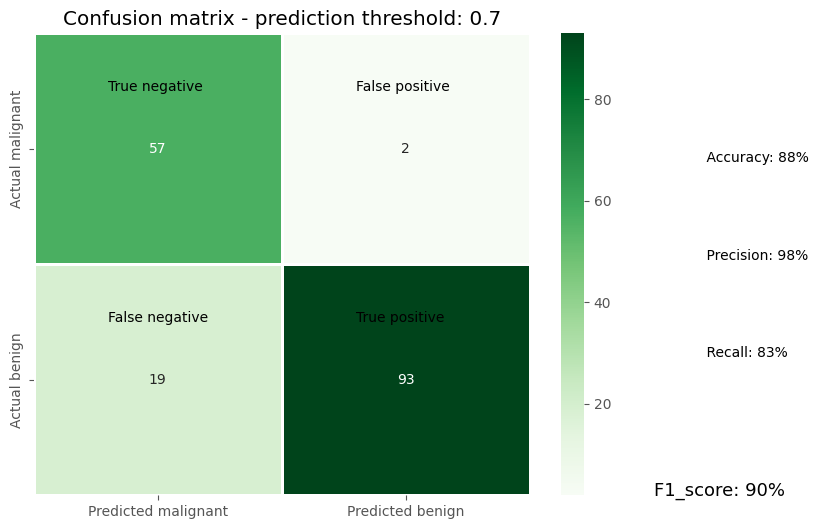

<Figure size 640x480 with 0 Axes>

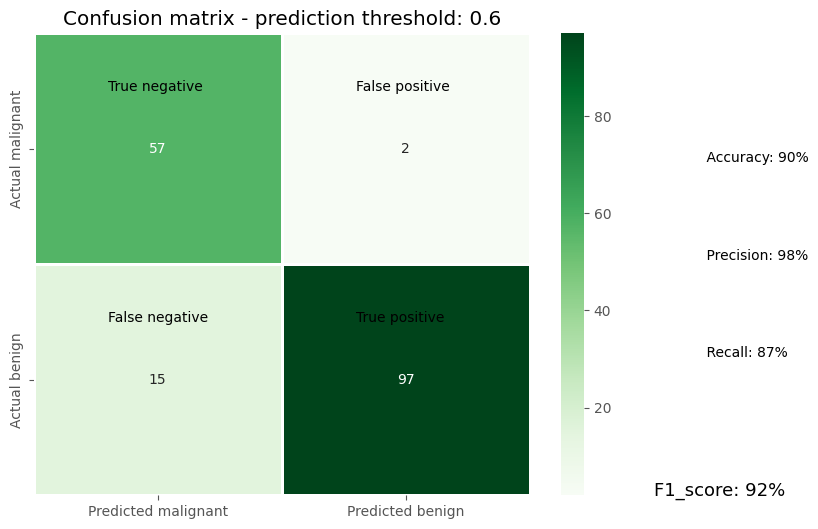

<Figure size 640x480 with 0 Axes>

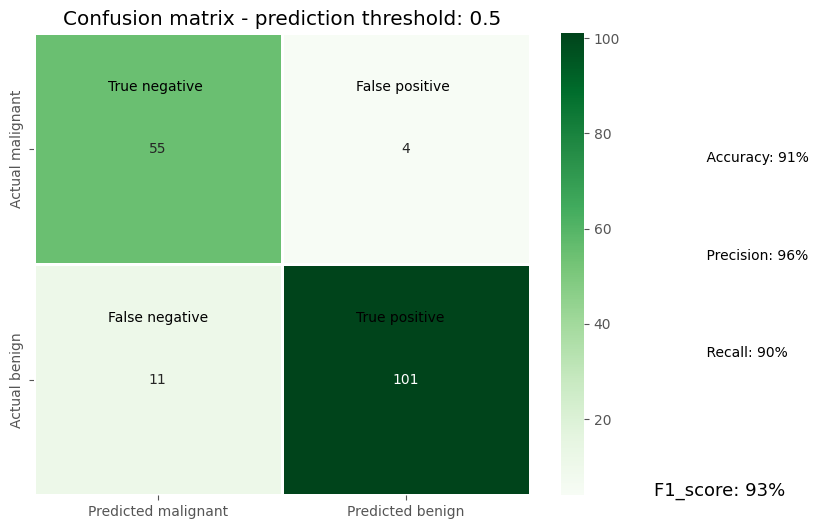

<Figure size 640x480 with 0 Axes>

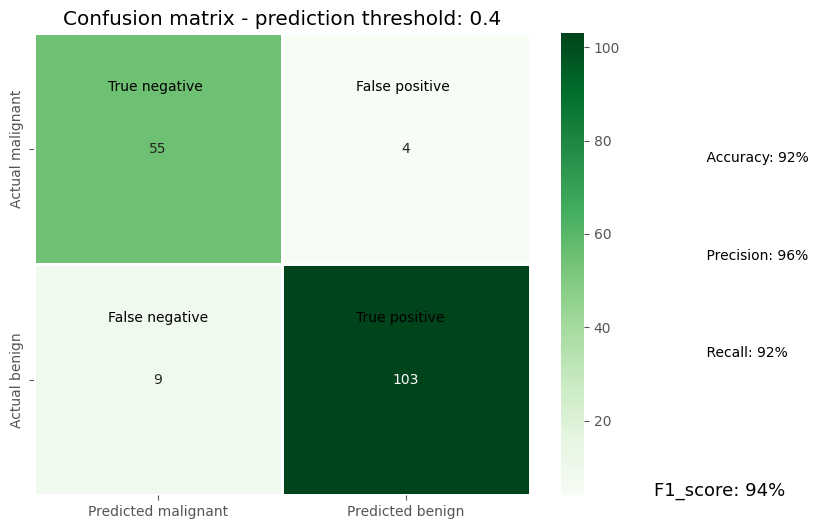

<Figure size 640x480 with 0 Axes>

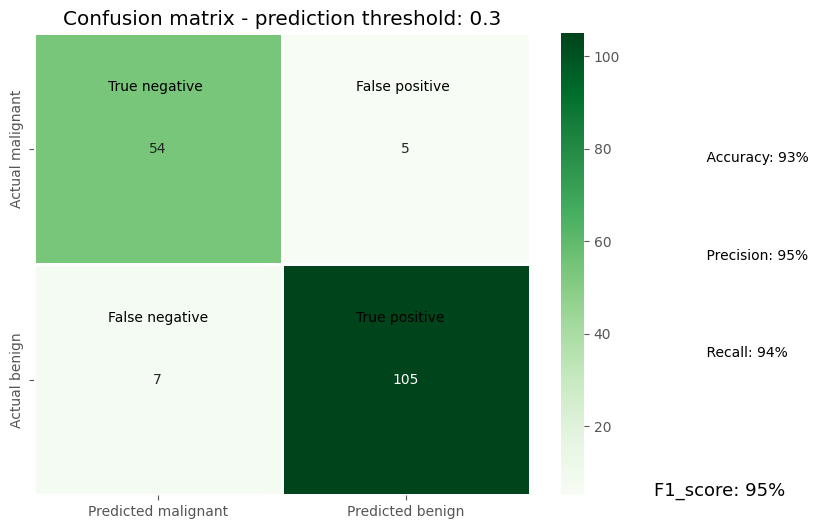

<Figure size 640x480 with 0 Axes>

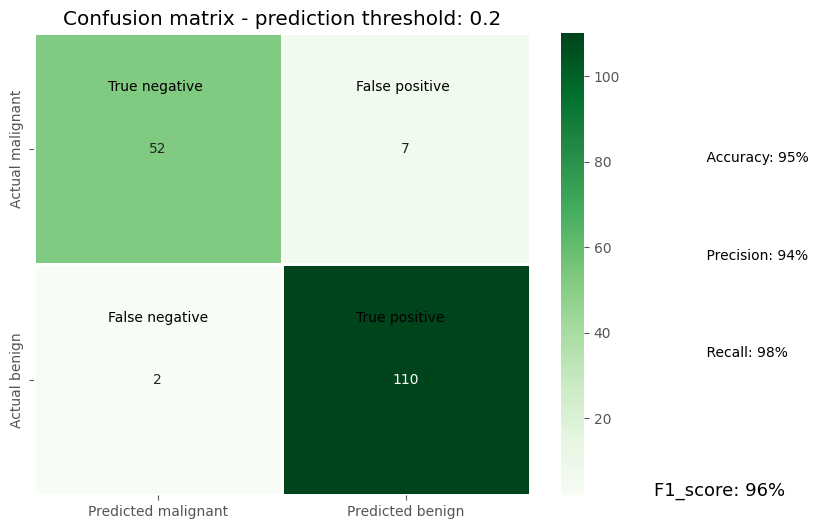

<Figure size 640x480 with 0 Axes>

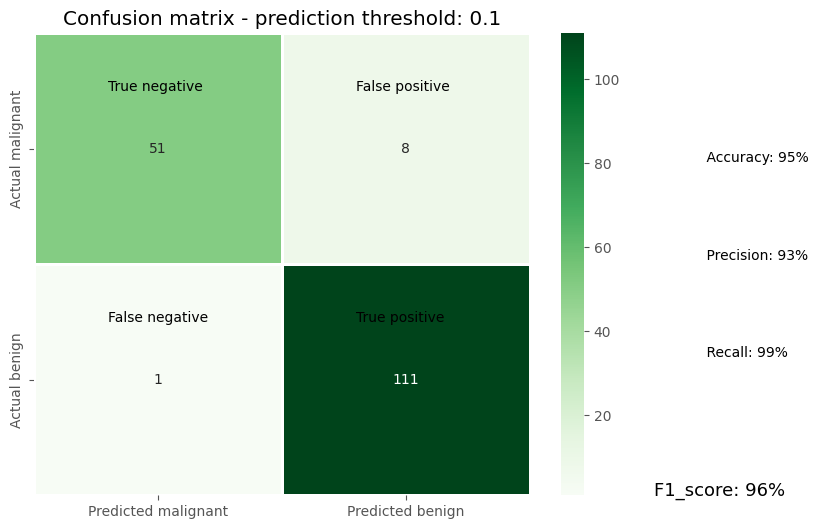

<Figure size 640x480 with 0 Axes>

In [65]:
helper.confusion_(model, X, y)

### Conclusion: 
``We can see that how using lower prediction threshold changes the results. If our goal is to minimalize the false negatives and the false positives at the same time in a way that their coefficient will be close to 1 that would be a good idea. With this solution we can avoid to mistreat people with malignant tumor while they have benign (False negatives, left bottom corner) or at least decrease the occurences of that, while controlling the false positives (minimalize the number of patitent who has malignant but we predicted benign) can increase the model precision rate which in this case is important. With this in mind the chosen threshold must be somewhere between 0.2 and 0.3 where the precision rate and the recall rate are the closest to each other.``

``This is a malignant-benign breast cancer prediction model based on those predictor features using the LogisticRegression algorithm and showing that the prediction threshold has to be chosen depending on the goals we achieve. If we want to save as many lives as possible we should maximize the precision score (as to minimize the FP ) not the number of False negatives. In this case, we should choose 0.6 as the threshold. If we want to maximalize both the recall and the precision scores at the same time we should choose 0.3 as the prediction threshold.``

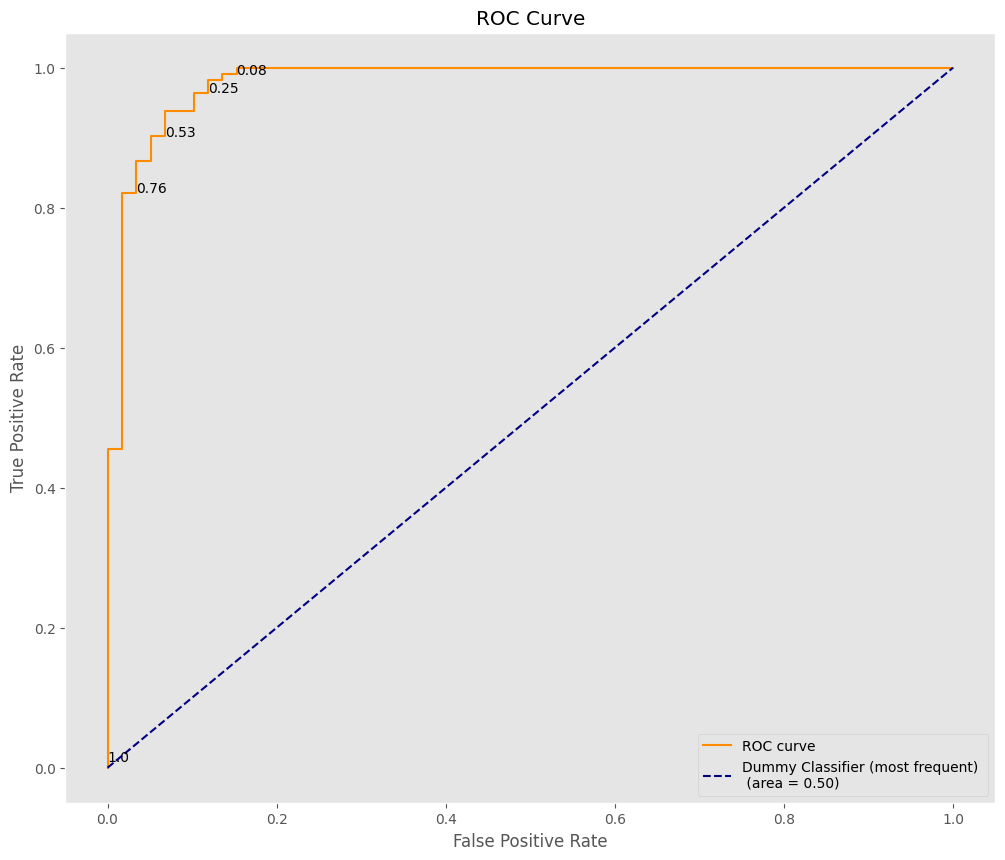

In [66]:
helper.roc_(model, X, y)

In [67]:
scores_and_k = []
accuracies = []
for k in range(1, 101):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  a = classifier.score(X_test, y_test)
  scores_and_k.append([a, k])
  accuracies.append(a)
print(max(scores_and_k))

[0.9532163742690059, 29]


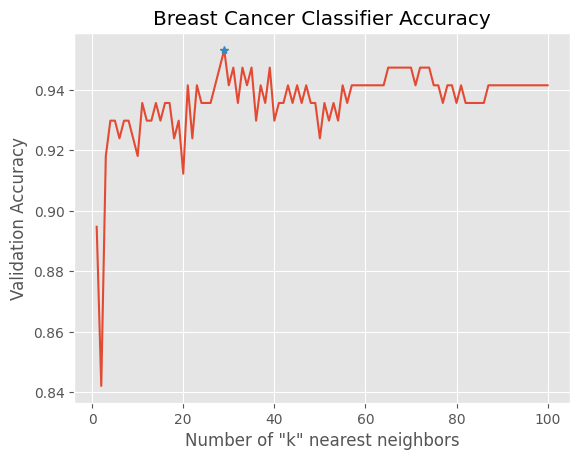

<Figure size 640x480 with 0 Axes>

In [68]:
k_list = list(range(1, 101))
plt.plot(k_list, accuracies)
plt.xlabel('Number of "k" nearest neighbors')
plt.ylabel('Validation Accuracy')
plt.title('Breast Cancer Classifier Accuracy')
plt.plot(max(scores_and_k)[1], max(scores_and_k)[0], '-*')
plt.show()
plt.clf()

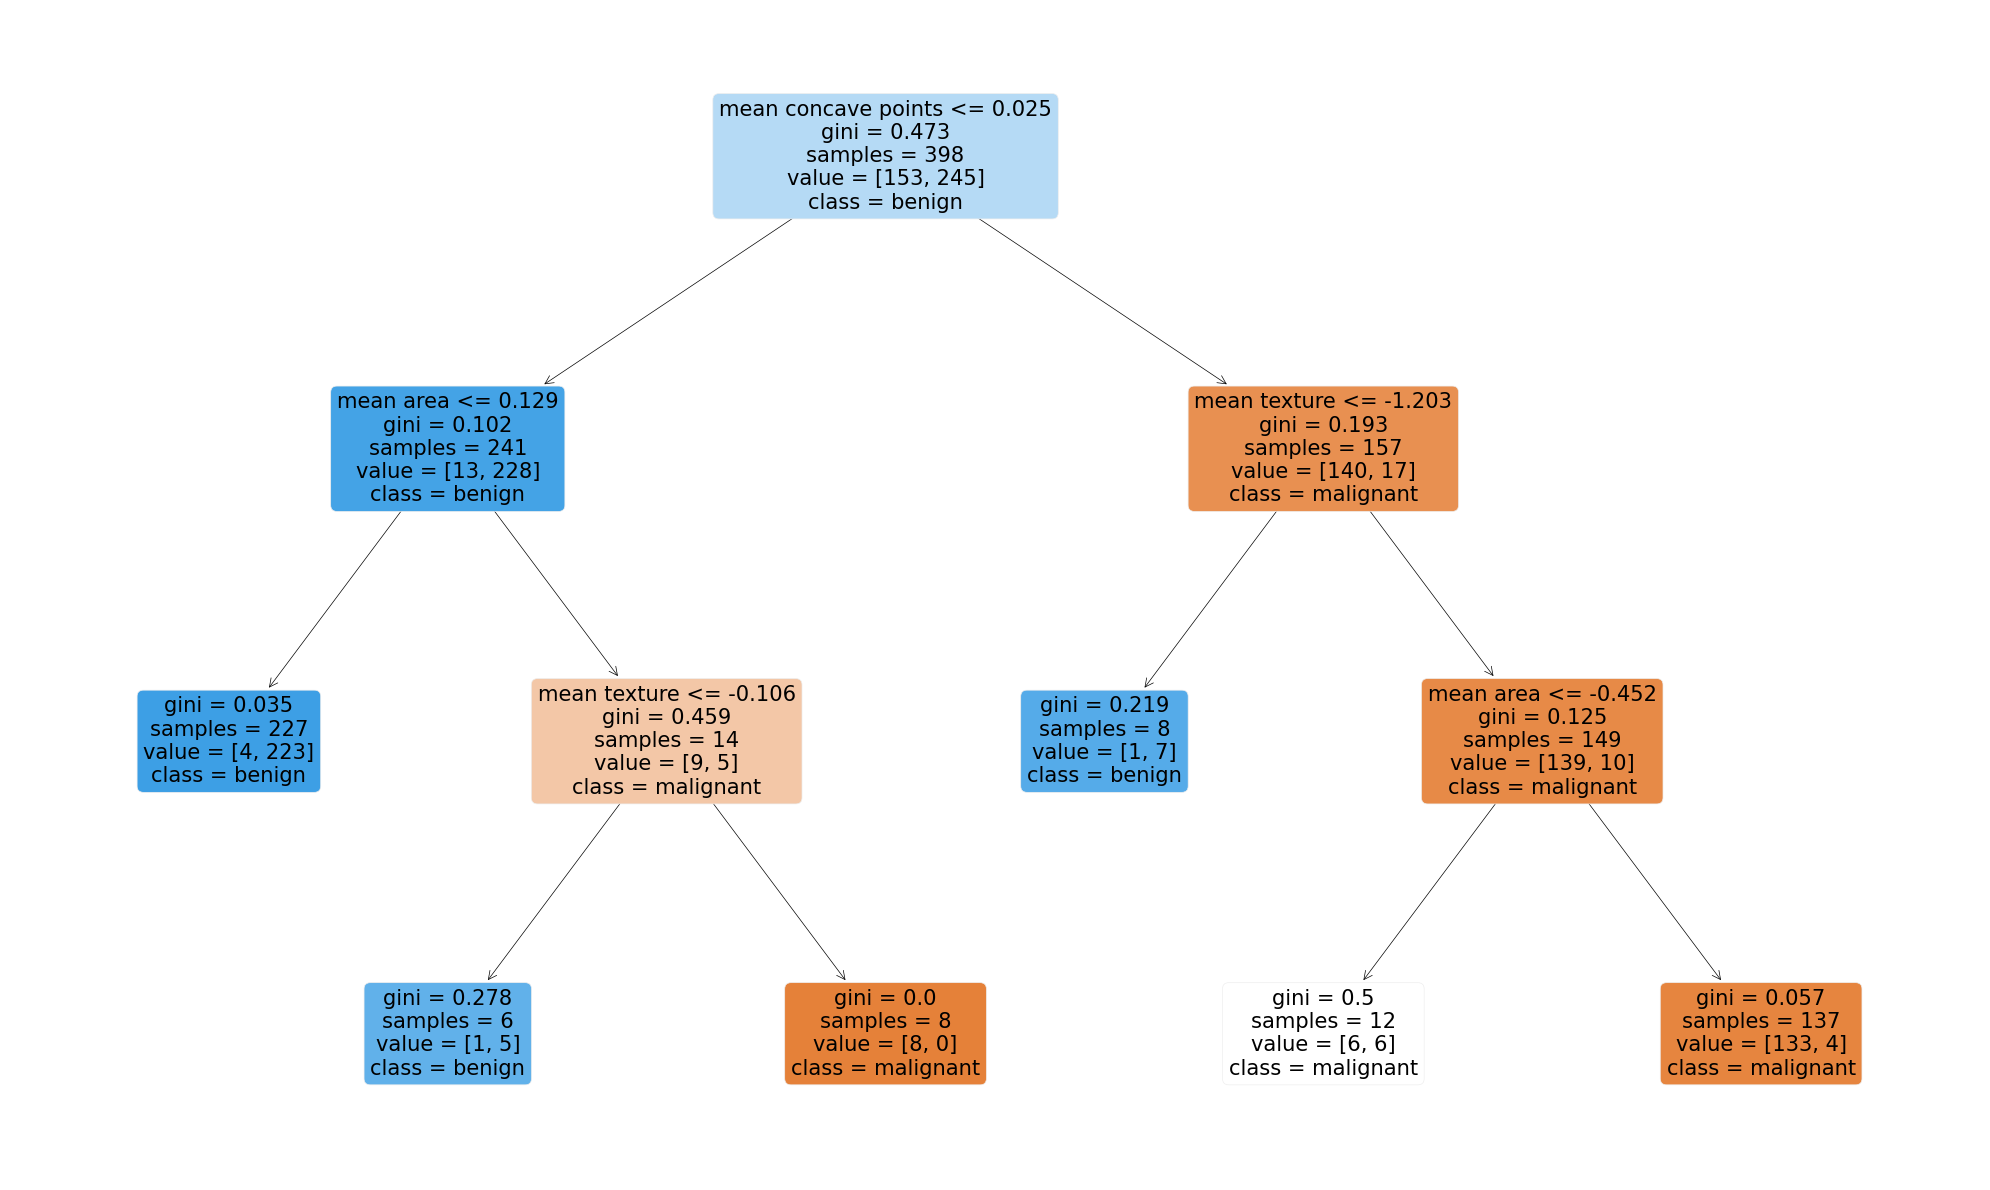

In [69]:
dt = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01,criterion='gini')
dt.fit(X_train, y_train)

plt.figure(figsize=(20,12))
tree.plot_tree(dt, feature_names = features, max_depth=5, class_names = ['malignant', 'benign'], label='all', filled=True, rounded=True)
plt.tight_layout()
plt.show()